## Assignment 4

### Paulo Santiago

This assignment asks you to use resources at hand to apply module 6 - Linear Regression to several sets of data.

## Learning Outcomes

- Exploratory analysis for regression
- Understand difference between linear and non-linear models
- Carry out OLS regression model
- Evaluate model


**Question 1**

* For each data set in Assignment4_linear_regression_data.xlsx:

- Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

* If the relation is not linear, transform the data accordingly. 
 - Try logarithm, exponential, square root, square, etc., for Y and/or X until you see a linear relation.  You only need to report what is the transformation chosen, not all the attempts. 
 Note:  most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations.  A generic way we did not cover is to use a Box-Cox transformation. 
 
* Create an OLS model for the original and transformed data if required. 
 - Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate. 

 - Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)
 - If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)


The output of the assignment should be: 

- OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

- A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

- An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.).  If the model is not linear, you need to transform the equation back to its original form.  

Check out the following if you need further guidance:
http://www.bzst.com/2009/09/interpreting-log-transformed-variables.html

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

https://stats.idre.ucla.edu/sas/faq/how-can-i-interpret-log-transformed-variables-in-terms-of-percent-change-in-linear-regression/

https://stats.stackexchange.com/questions/266722/interpretation-of-linear-regression-results-where-dependent-variable-is-transfor

- If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outlier.


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import scipy
#from scipy import stats
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

In [2]:
xlsx = pd.ExcelFile('Assignment4_linear_regresion_data.xlsx')

df1 = pd.read_excel(xlsx, 'Set 1')
df2 = pd.read_excel(xlsx, 'Set 2')
df3 = pd.read_excel(xlsx, 'Set 3')
# rename 'Y' column to lowercase to match others
df3 = df3.rename(str.lower, axis='columns')

df4 = pd.read_excel(xlsx, 'Set 4')
df4 = df4.rename(str.lower, axis='columns')

df5 = pd.read_excel(xlsx, 'Set 5')
df5 = df5.rename(str.lower, axis='columns')

df6 = pd.read_excel(xlsx, 'Set 6')

'\ndf1\ndf2\ndf3\ndf4\ndf5\ndf6\n'

# Set 1

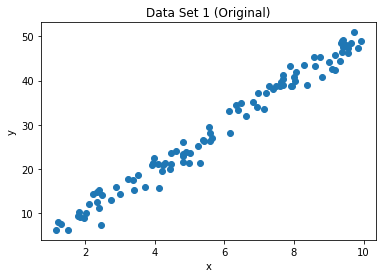

In [3]:
# Set 1
plt.plot(df1.x, df1.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 1 (Original)')
plt.show()

## Visual Analysis

Looking at the scatter plot of Data Set 1, visually we can see that there is a strong, positive correlation in the data. As x increases, so does y. It looks like there are no outliers, so a transformation of the data set is not necessary. An OLS regression will be performed on the original data set.

In [4]:
# correlation matrix
df1_cm = df1.corr(method = 'pearson')
df1_cm

,y,x
y,1.000000,0.989468
x,0.989468,1.000000


In [5]:
# mean of x and y
df1_mu_x = np.mean(df1.x)
df1_mu_y = np.mean(df1.y)

print("df1 x mean =", df1_mu_x, "df1 y mean =", df1_mu_y)

df1 x mean = 5.809318189398433 df1 y mean = 29.193214088275504


In [6]:
# standard deviation of x and y
df1_sig_x = np.std(df1.x, ddof=1)
df1_sig_y = np.std(df1.y, ddof=1 )

print("df1 x standard deviation =", df1_sig_x, "df1 y standard deviation =", df1_sig_y)

df1 x standard deviation = 2.6177123843290535 df1 y standard deviation = 13.186232166883334


In [7]:
# B0 and B1 of regression
df1_beta_1 = df1_sig_y/df1_sig_x * df1_cm.loc['x', 'y']
df1_beta_0 = df1_mu_y - df1_beta_1 * df1_mu_x

print("df1 B0 =", df1_beta_0, "df1 B1 =", df1_beta_1)

df1 B0 = 0.23807024664960608 df1 B1 = 4.984258547666893


In [8]:
# use OLS method
df1_m = sm.ols('y ~ x', data = df1)

In [9]:
# get the fit of m
df1_m = df1_m.fit()

In [10]:
# show intercept and x coefficient
df1_m.params

Intercept    0.238070
x            4.984259
dtype: float64

In [11]:
df1_intercept, df1_slope = df1_m.params
df1['y_est'] = df1_intercept + df1_slope * df1.x

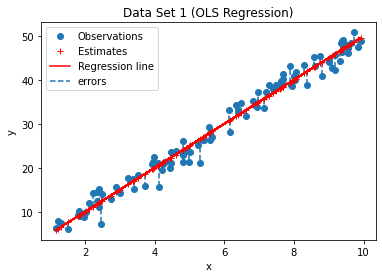

In [12]:
# plot OLS
# plot observations
plt.plot(df1.x, df1.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 1 (OLS Regression)')

# plot estimates
plt.plot(df1.x, df1.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df1.x, df1.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df1.x, df1.y_est, df1.y, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [13]:
df1_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           4.47e-84
Time:                        15:37:25   Log-Likelihood:                -206.03
No. Observations:                 100   AIC:                             416.1
Df Residuals:                      98   BIC:                             421.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2381      0.469      0.508      0.613      -0.693       1.169
x              4.9843      0.074     67.669      0.000       4.838       5.130
==============================================================================
Omnibus:                        4.971   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.783
Skew:                          -0.536   Prob(JB):                       0.0915
Kurtosis:                       2.988   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis (Original Data)

Looking at the OLS Regression summary of data set 1, the R-squared has a value of 0.979, thus the regression has a good fit with the dataset. In addition, The adjusted R-squared has the same value of 0.979. This means that if we replace some independent variables with differing numbers, the goodness of fit equation still works well. Therefore, we can conclude that the generated OLS regression fits the model well and is appropriate for the data set.

The equation of the regression is y_est = 0.2381 + 4.9843x

We can see that the intercept is 0.2381 and the slope or coefficient of the regresion parameters (B0 and B1) is 4.9843. There is a strong positive correlation between the two parameters.

# Set 2

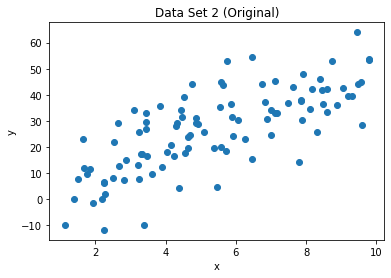

In [14]:
# Set 2
plt.plot(df2.x, df2.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 2 (Original)')
plt.show()

## Visual Analysis

Looking at the scatter plot of Data Set 2, visually we can see that there is a weak, positive correlation in the data. As x increases, so does y. There may be some outliers in the data, but first an OLS regression will be performed on the dataset and determine if further adjustments need to be made.

In [15]:
# correlation matrix
df2_cm = df2.corr(method = 'pearson')
df2_cm

,y,x
y,1.000000,0.745168
x,0.745168,1.000000


In [16]:
# mean of x and y
df2_mu_x = np.mean(df2.x)
df2_mu_y = np.mean(df2.y)

print("df2 x mean =", df2_mu_x, "df2 y mean =", df2_mu_y)

df2 x mean = 5.375184037349295 df2 y mean = 26.774707353588543


In [17]:
# standard deviation of x and y
df2_sig_x = np.std(df2.x, ddof=1)
df2_sig_y = np.std(df2.y, ddof=1 )

print("df2 x standard deviation =", df2_sig_x, "df2 y standard deviation =", df2_sig_y)

df2 x standard deviation = 2.4364560000707685 df2 y standard deviation = 15.620389615388762


In [18]:
# B0 and B1 of regression
df2_beta_1 = df2_sig_y/df2_sig_x * df2_cm.loc['x', 'y']
df2_beta_0 = df2_mu_y - df2_beta_1 * df2_mu_x

print("df2 B0 =", df2_beta_0, "df2 B1 =", df2_beta_1)

df2 B0 = 1.0955520655451245 df2 B1 = 4.777353688657472


In [19]:
# use OLS method
df2_m = sm.ols('y ~ x', data = df2)

In [20]:
# get the fit of m
df2_m = df2_m.fit()

In [21]:
# show intercept and x coefficient
df2_m.params

Intercept    1.095552
x            4.777354
dtype: float64

In [22]:
df2_intercept, df2_slope = df2_m.params
df2['y_est'] = df2_intercept + df2_slope * df2.x

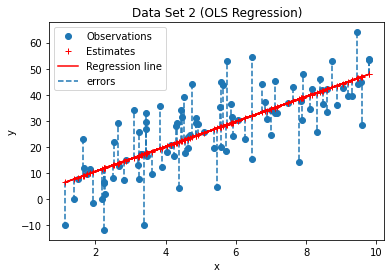

In [23]:
# plot OLS
# plot observations
plt.plot(df2.x, df2.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 2 (OLS Regression)')

# plot estimates
plt.plot(df2.x, df2.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df2.x, df2.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df2.x, df2.y_est, df2.y, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [24]:
df2_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           6.11e-19
Time:                        15:37:26   Log-Likelihood:                -375.73
No. Observations:                 100   AIC:                             755.5
Df Residuals:                      98   BIC:                             760.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0956      2.547      0.430      0.668      -3.958       6.149
x              4.7774      0.432     11.062      0.000       3.920       5.634
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.079
Skew:                          -0.065   Prob(JB):                        0.961
Kurtosis:                       3.045   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis

Looking at the OLS Regression summary of data set 2, the R-squared has a value of 0.555, thus the regression has a weak fit with the dataset. About slightly more than half of the data fits with the regression. In addition, The adjusted R-squared has a similar value of 0.551. Therefore, we can conclude that the generated OLS regression fits the model ok and may be appropriate for the data set. However, I will attempt to remove outliers and run another OLS regression to determine if that helps make the regression fit better.

The equation of the regression is y_est = 1.0856 + 4.7774x

We can see that the intercept is 1.0856 and the slope or coefficient of the regresion parameters (B0 and B1) is 4.7774. There is a strong positive correlation between the two parameters.

# Set 3

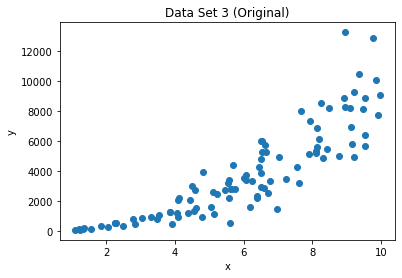

In [25]:
# Set 3
plt.plot(df3.x, df3.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 3 (Original)')
plt.show()

## Visual Analysis

Looking at the scatter plot of Data Set 3, visually we can see that there is a positive correlation in the data. As x increases, so does y. However, visually the graph does not look linear but instead looks like it follows the curve similar to y = x^2. First an OLS regression will be performed on the dataset, then transform the data to represent it more linearly.

In [26]:
# correlation matrix
df3_cm = df3.corr(method = 'pearson')
df3_cm

,y,x
y,1.000000,0.869031
x,0.869031,1.000000


In [27]:
# mean of x and y
df3_mu_x = np.mean(df3.x)
df3_mu_y = np.mean(df3.y)

print("df3 x mean =", df3_mu_x, "df3 y mean =", df3_mu_y)

df3 x mean = 5.999130000000001 df3 y mean = 3853.8435187740993


In [28]:
# standard deviation of x and y
df3_sig_x = np.std(df3.x, ddof=1)
df3_sig_y = np.std(df3.y, ddof=1 )

print("df3 x standard deviation =", df3_sig_x, "df3 y standard deviation =", df3_sig_y)

df3 x standard deviation = 2.44405810762231 df3 y standard deviation = 3042.5227162011843


In [29]:
# B0 and B1 of regression
df3_beta_1 = df3_sig_y/df3_sig_x * df3_cm.loc['x', 'y']
df3_beta_0 = df3_mu_y - df3_beta_1 * df3_mu_x

print("df3 B0 =", df3_beta_0, "df3 B1 =", df3_beta_1)

df3 B0 = -2636.1748393061157 df3 B1 = 1081.8265912024267


In [30]:
# use OLS method
df3_m = sm.ols('y ~ x', data = df3)

In [31]:
# get the fit of m
df3_m = df3_m.fit()

In [32]:
# show intercept and x coefficient
df3_m.params

Intercept   -2636.174839
x            1081.826591
dtype: float64

In [33]:
df3_intercept, df3_slope = df3_m.params
df3['y_est'] = df3_intercept + df3_slope * df3.x

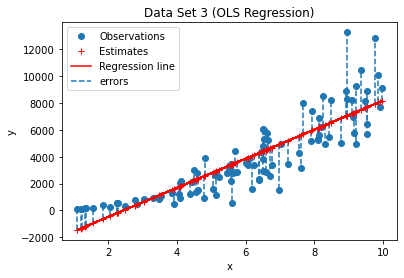

In [34]:
# plot OLS
# plot observations
plt.plot(df3.x, df3.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 3 (OLS Regression)')

# plot estimates
plt.plot(df3.x, df3.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df3.x, df3.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df3.x, df3.y_est, df3.y, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [35]:
df3_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.04e-31
Time:                        15:37:26   Log-Likelihood:                -873.07
No. Observations:                 100   AIC:                             1750.
Df Residuals:                      98   BIC:                             1755.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2636.1748    402.741     -6.546      0.000   -3435.400   -1836.949
x           1081.8266     62.216     17.388      0.000     958.361    1205.292
==============================================================================
Omnibus:                       21.170   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.896
Skew:                           0.863   Prob(JB):                     5.90e-09
Kurtosis:                       5.474   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis

Looking at the OLS Regression summary of data set 3, the R-squared has a value of 0.755, thus the regression has a decent fit with the dataset. In addition, The adjusted R-squared has a similar value of 0.753. Therefore, we can conclude that the generated OLS regression fits the model decently well and may be appropriate for the data set. 

The equation of the regression is y_est = -2636.1748 + 1081.8266x

We can see that the intercept is -2636.1748 and the slope or coefficient of the regresion parameters (B0 and B1) is 1081.8266. There is a strong positive correlation between the two parameters. The intercept and coefficient variable look to large and out of place to represent the data. Thus, a transformation of the data is needed.

Visually the data does not follow a linear trend, and the regression equation is not a good representation of the data. Thus, a Box-Cox transformation will be applied to the data to better represent it linearly.

In [36]:
df3_y_transformed, df3_lmbda = scipy.stats.boxcox(df3.y)
df3["y_transformed"] = df3_y_transformed
#df3_transformed = df3[["y_transformed"],[]]
df3_transformed = df3[["y_transformed", "x"]]
df3_transformed

,y_transformed,x
0,78.994369,9.517
1,54.763335,5.113
2,104.769880,9.773
3,74.057879,8.428
4,56.435874,5.752
...,...,...
95,72.663186,8.091
96,16.320093,1.325
97,49.668245,4.446
98,18.357036,1.335


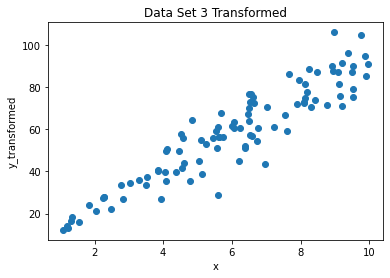

In [37]:
plt.plot(df3_transformed.x, df3_transformed.y_transformed, 'o')
plt.xlabel('x')
plt.ylabel('y_transformed')
plt.title('Data Set 3 Transformed')
plt.show()

## Visual Analysis (Box-Cox Transformation)

After applying the Box-Cox transformation to data set 3, visually the data better follows a linear trend rather than a parabolic trend. An OLS regression will be performed on the transformed data and compared with the original data.

In [76]:
'''fig = plt.figure()
ax1 = fig.add_subplot(211)
x = scipy.stats.loggamma.rvs(5, size=500) + 5
prob = scipy.stats.probplot(df3_transformed.x, dist=scipy.stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
xt, _ = scipy.stats.boxcox(df3_transformed.x)
prob = scipy.stats.probplot(xt, dist=scipy.stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()'''

"fig = plt.figure()\nax1 = fig.add_subplot(211)\nx = scipy.stats.loggamma.rvs(5, size=500) + 5\nprob = scipy.stats.probplot(df3_transformed.x, dist=scipy.stats.norm, plot=ax1)\nax1.set_xlabel('')\nax1.set_title('Probplot against normal distribution')\n\nax2 = fig.add_subplot(212)\nxt, _ = scipy.stats.boxcox(df3_transformed.x)\nprob = scipy.stats.probplot(xt, dist=scipy.stats.norm, plot=ax2)\nax2.set_title('Probplot after Box-Cox transformation')\n\nplt.show()"

In [77]:
# correlation matrix
df3_transformed_cm = df3_transformed.corr(method = 'pearson')
df3_transformed_cm

,y_transformed,x
y_transformed,1.00000,0.93141
x,0.93141,1.00000


In [79]:
# mean of x and y
df3_transformed_mu_x = np.mean(df3_transformed.x)
df3_transformed_mu_y = np.mean(df3_transformed.y_transformed)

print("df3_transformed x mean =", df3_transformed_mu_x, "df3_transformed y mean =", df3_transformed_mu_y)

df3_transformed x mean = 5.999130000000001 df3_transformed y mean = 58.071316635003


In [80]:
# standard deviation of x and y
df3_transformed_sig_x = np.std(df3_transformed.x, ddof=1)
df3_transformed_sig_y = np.std(df3_transformed.y_transformed, ddof=1 )

print("df3_transformed x standard deviation =", df3_transformed_sig_x, "df3_transformed y standard deviation =", df3_transformed_sig_y)

df3_transformed x standard deviation = 2.44405810762231 df3_transformed y standard deviation = 22.88912296027125


In [81]:
# B0 and B1 of regression
df3_transformed_beta_1 = df3_transformed_sig_y/df3_transformed_sig_x * df3_transformed_cm.loc['x', 'y_transformed']
df3_transformed_beta_0 = df3_transformed_mu_y - df3_transformed_beta_1 * df3_transformed_mu_x

print("df3_transformed B0 =", df3_transformed_beta_0, "df3_transformed B1 =", df3_transformed_beta_1)

df3_transformed B0 = 5.741774392659124 df3_transformed B1 = 8.722855187726198


In [82]:
# use OLS method
df3_transformed_m = sm.ols('y_transformed ~ x', data = df3_transformed)

In [83]:
# get the fit of m
df3_transformed_m = df3_transformed_m.fit()

In [85]:
# show intercept and x coefficient
df3_transformed_m.params

Intercept    5.741774
x            8.722855
dtype: float64

In [87]:
df3_transformed_intercept, df3_transformed_slope = df3_transformed_m.params
df3_transformed['y_est'] = df3_transformed_intercept + df3_transformed_slope * df3_transformed.x
#df3_transformed

/var/folders/dl/nzqz9d4s48z5l005svj0w2sr0000gn/T/ipykernel_27748/3443789544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_transformed['y_est'] = df3_transformed_intercept + df3_transformed_slope * df3_transformed.x


,y_transformed,x,y_est
0,78.994369,9.517,88.757187
1,54.763335,5.113,50.341733
2,104.769880,9.773,90.990238
3,74.057879,8.428,79.257998
4,56.435874,5.752,55.915637
...,...,...,...
95,72.663186,8.091,76.318396
96,16.320093,1.325,17.299558
97,49.668245,4.446,44.523589
98,18.357036,1.335,17.386786


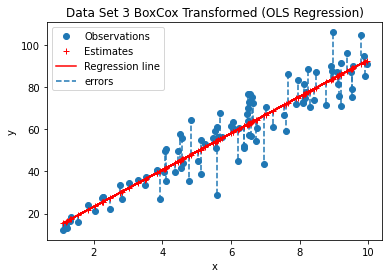

In [88]:
# plot OLS
# plot observations
plt.plot(df3_transformed.x, df3_transformed.y_transformed, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 3 BoxCox Transformed (OLS Regression)')

# plot estimates
plt.plot(df3_transformed.x, df3_transformed.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df3_transformed.x, df3_transformed.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df3_transformed.x, df3_transformed.y_est, df3_transformed.y_transformed, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [89]:
df3_transformed_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_transformed   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     641.8
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           8.32e-45
Time:                        16:10:22   Log-Likelihood:                -353.39
No. Observations:                 100   AIC:                             710.8
Df Residuals:                      98   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7418      2.229      2.576      0.011       1.319      10.165
x              8.7229      0.344     25.333      0.000       8.040       9.406
==============================================================================
Omnibus:                        3.044   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.483
Skew:                          -0.254   Prob(JB):                        0.289
Kurtosis:                       3.582   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis (Box-Cox Transformation)

Looking at the OLS Regression summary of dataset 3 after performing a Box-Cox transformation, the R-squared has a value of 0.868 and a similar adjusted R-squared of 0.866. This regression better represents the data when compared to the original OLS regression. Previously, the R-squared had a value of 0.755 and adjusted R-squared of 0.753. The new regression has a strong, positive, linear correlation and can conclude that the new oLS regression fits the model well.

The new equation of the regression is y_est = 5.7418 + 8.7229x and suits the trend of the data better. Compared to the original regression equation of y_est = -2636.1748 + 1081.8266x the new equation does not have an extreme intercept and x coefficient. Therefore, we can conclude that the Box-Cox transformation applied to dataset 3 was effective and better represents the data when performing an OLS regression.

# Set 4

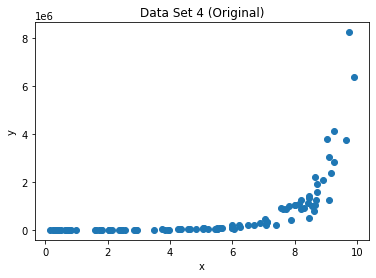

In [38]:
# Set 4
plt.plot(df4.x, df4.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 4 (Original)')
plt.show()

## Visual Analysis

Looking at the scatter plot of Data Set 4, visually we can see that there is a positive correlation in the data. As x increases, so does y. However, visually the graph does not look linear but instead looks like it follows the curve similar to y = x^2. First an OLS regression will be performed on the dataset, then transform the data to represent it more linearly.

In [39]:
# correlation matrix
df4_cm = df4.corr(method = 'pearson')
df4_cm

,y,x
y,1.000000,0.616155
x,0.616155,1.000000


In [40]:
# mean of x and y
df4_mu_x = np.mean(df4.x)
df4_mu_y = np.mean(df4.y)

print("df4 x mean =", df4_mu_x, "df4 y mean =", df4_mu_y)

df4 x mean = 5.227871000000001 df4 y mean = 661442.8636142033


In [41]:
# standard deviation of x and y
df4_sig_x = np.std(df4.x, ddof=1)
df4_sig_y = np.std(df4.y, ddof=1 )

print("df4 x standard deviation =", df4_sig_x, "df4 y standard deviation =", df4_sig_y)

df4 x standard deviation = 2.9860725563821755 df4 y standard deviation = 1311668.294702755


In [42]:
# B0 and B1 of regression
df4_beta_1 = df4_sig_y/df4_sig_x * df4_cm.loc['x', 'y']
df4_beta_0 = df4_mu_y - df4_beta_1 * df4_mu_x

print("df4 B0 =", df4_beta_0, "df4 B1 =", df4_beta_1)

df4 B0 = -753498.668130064 df4 B1 = 270653.49006206676


In [43]:
# use OLS method
df4_m = sm.ols('y ~ x', data = df4)

In [44]:
# get the fit of m
df4_m = df4_m.fit()

In [45]:
# show intercept and x coefficient
df4_m.params

Intercept   -753498.668130
x            270653.490062
dtype: float64

In [46]:
df4_intercept, df4_slope = df4_m.params
df4['y_est'] = df4_intercept + df4_slope * df4.x

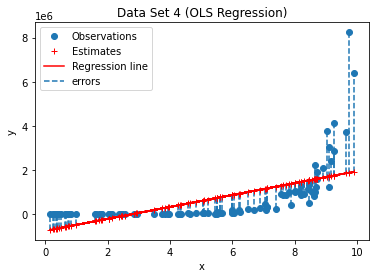

In [47]:
# plot OLS
# plot observations
plt.plot(df4.x, df4.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 4 (OLS Regression)')

# plot estimates
plt.plot(df4.x, df4.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df4.x, df4.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df4.x, df4.y_est, df4.y, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [48]:
df4_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           8.87e-12
Time:                        15:37:27   Log-Likelihood:                -1526.2
No. Observations:                 100   AIC:                             3056.
Df Residuals:                      98   BIC:                             3062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.535e+05    2.1e+05     -3.585      0.001   -1.17e+06   -3.36e+05
x           2.707e+05   3.49e+04      7.744      0.000    2.01e+05     3.4e+05
==============================================================================
Omnibus:                      102.143   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.666
Skew:                           3.381   Prob(JB):                    5.89e-273
Kurtosis:                      18.973   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis

Looking at the OLS Regression summary of dataset 4, the R-squared has a value of 0.380 and a similar adjusted R-squared has a similar value of 0.373. Thus, we can conclude that the generated OLS regression does not fit the model well and a transformation will be applied to make the dataset more linear.

The equation of the regression is y_est = -7.535e+05 + 2.707e+05x

We can see that the intercept is -7.535e+05 and the slope or coefficient of the regresion parameters (B0 and B1) is 2.707e+05. There is a weak, positive correlation between the two parameters. The intercept and coefficient variable look out of place to represent the data. Thus, a transformation of the data is needed.

Visually the data does not follow a linear trend, and the regression equation is not a good representation of the data. Thus, a Box-Cox transformation will be applied to the data to better represent it linearly.

In [90]:
df4_y_transformed, df4_lmbda = scipy.stats.boxcox(df4.y)
df4["y_transformed"] = df4_y_transformed
df4_transformed = df4[["y_transformed", "x"]]
df4_transformed

,y_transformed,x
0,15.845421,5.9947
1,10.744711,3.9492
2,21.137578,9.6353
3,7.268976,0.4943
4,20.742666,9.0811
...,...,...
95,18.943980,8.4176
96,18.748792,8.5450
97,12.709909,5.4277
98,18.453171,7.6067


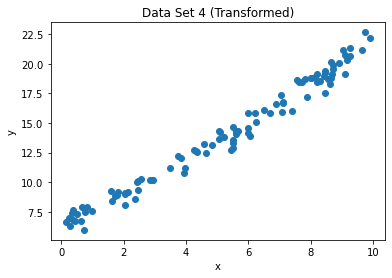

In [91]:
# Set 4
plt.plot(df4_transformed.x, df4_transformed.y_transformed, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 4 (Transformed)')
plt.show()

## Visual Analysis (Box-Cox Transformation)

After applying the Box-Cox transformation to data set 4, visually the data better follows a linear trend rather than a parabolic trend. An OLS regression will be performed on the transformed data and compared with the original data.

In [92]:
# correlation matrix
df4_transformed_cm = df4_transformed.corr(method = 'pearson')
df4_transformed_cm

,y_transformed,x
y_transformed,1.000000,0.989315
x,0.989315,1.000000


In [93]:
# mean of x and y
df4_transformed_mu_x = np.mean(df4_transformed.x)
df4_transformed_mu_y = np.mean(df4_transformed.y_transformed)

print("df4_transformed x mean =", df4_transformed_mu_x, "df4_transformed y mean =", df4_transformed_mu_y)

df4_transformed x mean = 5.227871000000001 df4_transformed y mean = 14.014783226310287


In [94]:
# standard deviation of x and y
df4_transformed_sig_x = np.std(df4_transformed.x, ddof=1)
df4_transformed_sig_y = np.std(df4_transformed.y_transformed, ddof=1 )

print("df4_transformed x standard deviation =", df4_transformed_sig_x, "df4_transformed y standard deviation =", df4_transformed_sig_y)

df4_transformed x standard deviation = 2.9860725563821755 df4_transformed y standard deviation = 4.66995245770154


In [95]:
# B0 and B1 of regression
df4_transformed_beta_1 = df4_transformed_sig_y/df4_transformed_sig_x * df4_transformed_cm.loc['x', 'y_transformed']
df4_transformed_beta_0 = df4_transformed_mu_y - df4_transformed_beta_1 * df4_transformed_mu_x

print("df4_transformed B0 =", df4_transformed_beta_0, "df4_transformed B1 =", df4_transformed_beta_1)

df4_transformed B0 = 5.9262195982961 df4_transformed B1 = 1.5472003092681867


In [96]:
# use OLS method
df4_transformed_m = sm.ols('y_transformed ~ x', data = df4_transformed)

In [97]:
# get the fit of m
df4_transformed_m = df4_transformed_m.fit()

In [98]:
# show intercept and x coefficient
df4_transformed_m.params

Intercept    5.92622
x            1.54720
dtype: float64

In [99]:
df4_transformed_intercept, df4_transformed_slope = df4_transformed_m.params
df4_transformed['y_est'] = df4_transformed_intercept + df4_transformed_slope * df4_transformed.x

/var/folders/dl/nzqz9d4s48z5l005svj0w2sr0000gn/T/ipykernel_27748/1264199914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_transformed['y_est'] = df4_transformed_intercept + df4_transformed_slope * df4_transformed.x


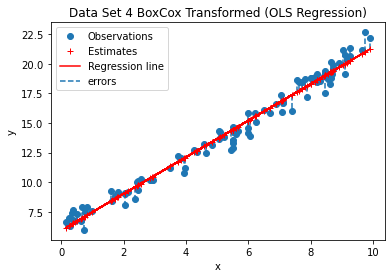

In [100]:
# plot OLS
# plot observations
plt.plot(df4_transformed.x, df4_transformed.y_transformed, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 4 BoxCox Transformed (OLS Regression)')

# plot estimates
plt.plot(df4_transformed.x, df4_transformed.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df4_transformed.x, df4_transformed.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df4_transformed.x, df4_transformed.y_est, df4_transformed.y_transformed, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [101]:
df4_transformed_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_transformed   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4512.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           9.06e-84
Time:                        16:41:12   Log-Likelihood:                -102.95
No. Observations:                 100   AIC:                             209.9
Df Residuals:                      98   BIC:                             215.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9262      0.138     42.789      0.000       5.651       6.201
x              1.5472      0.023     67.174      0.000       1.501       1.593
==============================================================================
Omnibus:                        2.768   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.703
Skew:                          -0.394   Prob(JB):                        0.259
Kurtosis:                       2.833   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis (Box-Cox Transformation)

Looking at the OLS Regression summary of dataset 4 after performing a Box-Cox transformation, the R-squared and adjust R-squared have a value of 0.979. This regression better represents the data when compared to the original OLS regression. Previously, the R-squared had a value of 0.380 and adjusted R-squared of 0.373. The new regression is much more significant, and has a strong, positive, linear correlation. We can conclude that the new OLS regression fits the model very well.

The new equation of the regression is y_est = 5.9262 + 1.5472x and suits the trend of the data better. Compared to the original regression equation of y_est = -7.535e+05 + 2.707e+05x, the new equation does not have an extreme intercept and x coefficient. Therefore, we can conclude that the Box-Cox transformation applied to dataset 4 was effective and better represents the data when performing an OLS regression.

# Set 5

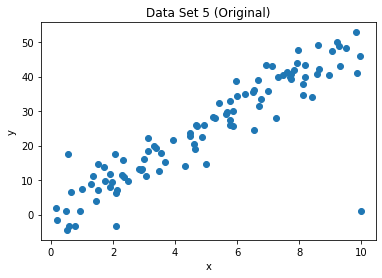

In [49]:
# Set 5
plt.plot(df5.x, df5.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 5 (Original)')
plt.show()

## Visual Analysis

Looking at the scatter plot of Data Set 5, visually we can see that there is a strong, positive correlation in the data. As x increases, so does y. However, visually the graph looks linear, however there seems to be a few outliers in the data. First an OLS regression will be performed on the dataset, then transform the data to represent it more linearly.

In [50]:
# correlation matrix
df5_cm = df5.corr(method = 'pearson')
df5_cm

,y,x
y,1.000000,0.897892
x,0.897892,1.000000


In [51]:
# mean of x and y
df5_mu_x = np.mean(df5.x)
df5_mu_y = np.mean(df5.y)

print("df5 x mean =", df5_mu_x, "df5 y mean =", df5_mu_y)

df5 x mean = 4.975682277227723 df5 y mean = 24.640736209557026


In [52]:
# standard deviation of x and y
df5_sig_x = np.std(df5.x, ddof=1)
df5_sig_y = np.std(df5.y, ddof=1 )

print("df5 x standard deviation =", df5_sig_x, "df5 y standard deviation =", df5_sig_y)

df5 x standard deviation = 2.852301356708958 df5 y standard deviation = 15.143420359947635


In [53]:
# B0 and B1 of regression
df5_beta_1 = df5_sig_y/df5_sig_x * df5_cm.loc['x', 'y']
df5_beta_0 = df5_mu_y - df5_beta_1 * df5_mu_x

print("df5 B0 =", df5_beta_0, "df5 B1 =", df5_beta_1)

df5 B0 = 0.9212565388609768 df5 B1 = 4.767080844219763


In [54]:
# use OLS method
df5_m = sm.ols('y ~ x', data = df5)

In [55]:
# get the fit of m
df5_m = df5_m.fit()

In [56]:
# show intercept and x coefficient
df5_m.params

Intercept    0.921257
x            4.767081
dtype: float64

In [57]:
df5_intercept, df5_slope = df5_m.params
df5['y_est'] = df5_intercept + df5_slope * df5.x

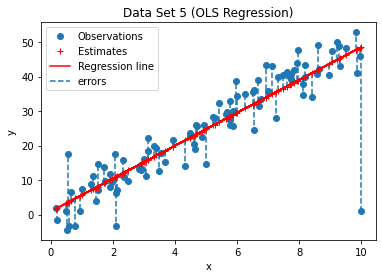

In [58]:
# plot OLS
# plot observations
plt.plot(df5.x, df5.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 5 (OLS Regression)')

# plot estimates
plt.plot(df5.x, df5.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df5.x, df5.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df5.x, df5.y_est, df5.y, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [59]:
df5_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           4.70e-37
Time:                        15:37:28   Log-Likelihood:                -334.42
No. Observations:                 101   AIC:                             672.8
Df Residuals:                      99   BIC:                             678.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9213      1.346      0.685      0.495      -1.749       3.591
x              4.7671      0.235     20.294      0.000       4.301       5.233
==============================================================================
Omnibus:                      113.783   Durbin-Watson:                   1.491
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2578.951
Skew:                          -3.591   Prob(JB):                         0.00
Kurtosis:                      26.691   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis

Looking at the OLS Regression summary of dataset 5, the R-squared has a value of 0.806 and a similar adjusted R-squared has a similar value of 0.804. Thus, we can conclude that the generated OLS regression fits the model fairly well.

The equation of the regression is y_est = 0.9213 + 4.7671x

We can see that the intercept is 0.9213 and the slope or coefficient of the regresion parameters (B0 and B1) is 4.7671. There is a strong, positive correlation between the two parameters.

# Set 6

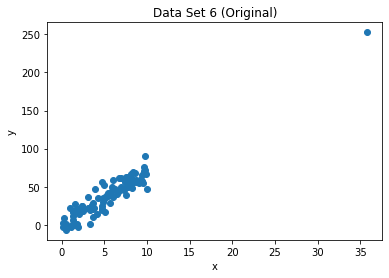

In [60]:
# Set 6
plt.plot(df6.x, df6.y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 6 (Original)')
plt.show()

## Visual Analysis

Looking at the scatter plot of Data Set 6, visually we can see that there is a strong, positive correlation in the data. As x increases, so does y. However, visually the graph looks linear, however there seems to be one very obvious outlier in the data. First an OLS regression will be performed on the dataset.

In [61]:
# correlation matrix
df6_cm = df6.corr(method = 'pearson')
df6_cm

,y,x
y,1.000000,0.955578
x,0.955578,1.000000


In [62]:
# mean of x and y
df6_mu_x = np.mean(df6.x)
df6_mu_y = np.mean(df6.y)

print("df6 x mean =", df6_mu_x, "df6 y mean =", df6_mu_y)

df6 x mean = 5.618742574257427 df6 y mean = 39.17820780213763


In [63]:
# standard deviation of x and y
df6_sig_x = np.std(df6.x, ddof=1)
df6_sig_y = np.std(df6.y, ddof=1 )

print("df6 x standard deviation =", df6_sig_x, "df6 y standard deviation =", df6_sig_y)

df6 x standard deviation = 4.268606722534803 df6 y standard deviation = 31.39086404094349


In [64]:
# B0 and B1 of regression
df6_beta_1 = df6_sig_y/df6_sig_x * df6_cm.loc['x', 'y']
df6_beta_0 = df6_mu_y - df6_beta_1 * df6_mu_x

print("df6 B0 =", df6_beta_0, "df6 B1 =", df6_beta_1)

df6 B0 = -0.3059107436463293 df6 B1 = 7.027216147378344


In [65]:
# use OLS method
df6_m = sm.ols('y ~ x', data = df6)

In [66]:
# get the fit of m
df6_m = df6_m.fit()

In [67]:
# show intercept and x coefficient
df6_m.params

Intercept   -0.305911
x            7.027216
dtype: float64

In [68]:
df6_intercept, df6_slope = df6_m.params
df6['y_est'] = df6_intercept + df6_slope * df6.x

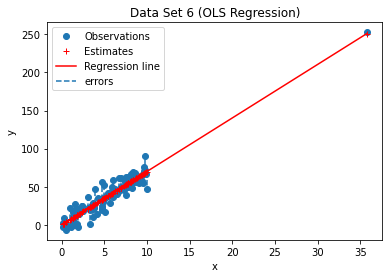

In [69]:
# plot OLS
# plot observations
plt.plot(df6.x, df6.y, 'o', label = 'Observations')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Set 6 (OLS Regression)')

# plot estimates
plt.plot(df6.x, df6.y_est, 'r+', label='Estimates')

# plot regression
plt.plot(df6.x, df6.y_est, 'r-', label='Regression line')

# plot errors
plt.vlines(df6.x, df6.y_est, df6.y, linestyles='dashed', label = 'errors')

# add legend
plt.legend()
plt.show()

In [70]:
df6_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           2.49e-54
Time:                        15:37:28   Log-Likelihood:                -367.52
No. Observations:                 101   AIC:                             739.0
Df Residuals:                      99   BIC:                             744.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3059      1.534     -0.199      0.842      -3.350       2.739
x              7.0272      0.218     32.259      0.000       6.595       7.459
==============================================================================
Omnibus:                        0.494   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.262
Skew:                           0.120   Prob(JB):                        0.877
Kurtosis:                       3.070   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analysis

Looking at the OLS Regression summary of data set 6, the R-squared has a value of 0.913, thus the regression has a good fit with the dataset. In addition, The adjusted R-squared has a similar value of 0.912. Thus, the goodness of fit equation still works well. Therefore, we can conclude that the generated OLS regression fits the model well and is appropriate for the data set.

The equation of the regression is y_est = -0.3059 + 7.0272x

We can see that the intercept is -0.3059 and the slope or coefficient of the regresion parameters (B0 and B1) is 7.0272. There is a strong positive correlation between the two parameters.